## The Sparks Foundation Internship
GRIP(Graduate Rotational Internship Program) October 2022

Data Science and Business Analytics intern

AUTHOR :Saad Mukhtar Kazi

Task 1 :Prediction using Supervised Machine Learning
        Simple Linear Regression Task

## Problem Statement:
Prediction using Supervised Machine Learning.
Predict the percentage of an student based on the number of study hours.
What will be the predicted score if a student studies for 9.25hr/day?

In [1]:
## importing libraries
import pandas as pd'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##observation: pandas, numpy, matplotlib, linear_model libraries got imported

In [2]:
## data =http://bit.ly/w-data

# reading dataset from url link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)
data

## observation: Dataset read and displayed

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
## shape of data 
data.shape
## observation: The number of rows is 25 and columns is 2

(25, 2)

In [4]:
## columns name
data.columns
## observation: Hours and Scores 

Index(['Hours', 'Scores'], dtype='object')

In [5]:
## memory usage
data.memory_usage()

Index     128
Hours     200
Scores    200
dtype: int64

In [6]:
## reading top 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
## descriptive statitics of Hours and Scores
## T-Transpose
data.describe().T
## observation: there are no missing values as both columns row count is 25.

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [8]:
## duplicated values sum
data.duplicated().sum()
## observation : no duplicate values

0

In [9]:
## skewness 
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [10]:
## checking normal test results
from scipy.stats import normaltest
normaltest(data['Hours'])

NormaltestResult(statistic=5.733510552470018, pvalue=0.056883197727184746)

## Exploratory Data Analysis

In [11]:
## computing q1 , q2 at 25 and 75 percent respectively,  upper and lower limit 
q1=data['Hours'].quantile(0.25)
q3=data['Hours'].quantile(0.75)
IQR= q3-q1
upper_limit= q3 +(1.5*IQR)
lower_limit= q3 -(1.5*IQR)

In [12]:
# printing upper limit 
upper_limit

14.450000000000001

In [13]:
## printing lower limit
lower_limit

0.34999999999999964

In [14]:
## Checking rows with outliers
data_outlier_lowerlimit=data[data['Hours']<lower_limit]
data_outlier_lowerlimit

## observation: no outliers present

,Hours,Scores


In [15]:
##  Checking rows with outliers
data_outlier_upperlimit=data[data['Hours']>upper_limit]
data_outlier_upperlimit

## observation: no outliers present

,Hours,Scores


## Graphical Analysis

<AxesSubplot:xlabel='Scores', ylabel='Density'>

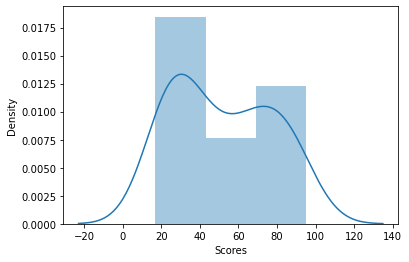

In [16]:
## checking the distribution of scores in dataset
sns.distplot(data['Scores'])

## observation: almost normally distributed(bimodal)

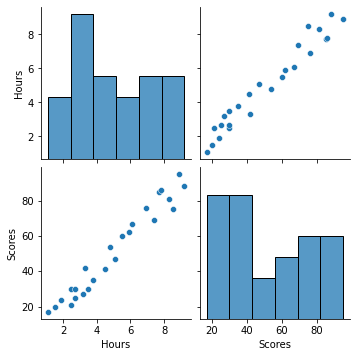

In [17]:
##plotting scores 
import seaborn as sns
sns.pairplot(data)
## we usually use pair plot in multivaraiate analysis

## observation : A linear relationship is depicted between the number of study hours and the percentage score

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

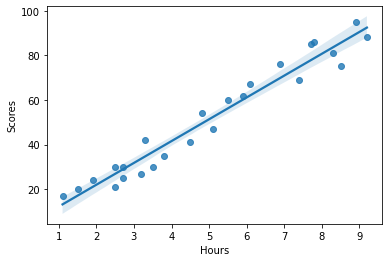

In [18]:
## plotting regression plot
## reg plot plots the data and the linear regression model fit line
sns.regplot(x="Hours",y="Scores",data=data)


<AxesSubplot:>

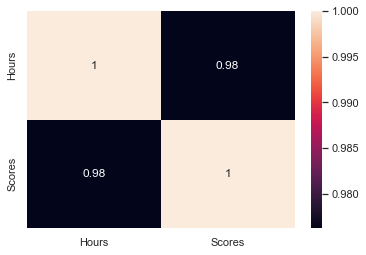

In [19]:
## Plotting heat map to check correlation
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(data.corr(),annot=True)

# Preparing the data

In [20]:
## Independent X And Dependent y Features
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [21]:
# printing independent X features
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [22]:
# printing independent X features
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [23]:
# importing train_test_split 
from sklearn.model_selection import train_test_split  

# Splitting Data Into Train and Test data
#test size : how much percent of data points allocated for test data, here we have selected 20 percent so 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
# printing the number of rows and columns
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(20, 1) (5, 1) (20,) (5,)


# Linear Regression Model Training

In [25]:
## importing LinearRegression

from sklearn.linear_model import LinearRegression

# name of object:regression
regression=LinearRegression()

In [26]:
# training the data
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
## printing the regresssion coefficients 
print(regression.coef_)

[9.68207815]


In [28]:
 ## printing  the intercept
print(regression.intercept_)

2.826892353899737


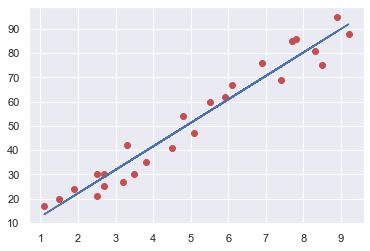

In [29]:
# Plotting the regression line
regression_line = regression.intercept_+regression.coef_*X

# Plotting for the test data
plt.scatter(X, y, c= 'r')
plt.plot(X, regression_line);
plt.show()

In [30]:
## Prediction from the test data
reg_pred=regression.predict(X_test)
print(reg_pred) 

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [31]:
## residuals
residuals =y_test-reg_pred
residuals

# residuals are errors 

array([-2.18814104,  2.96791226, -6.03208774,  6.36676838,  2.04884653])

In [32]:
## Computing Training and Testing Accuracy Scores

print("Training Score:",regression.score(X_train,y_train)*100)
print("Testing Score:",regression.score(X_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


In [33]:
## Predictions on the Test Set

In [34]:
## Problem Statement 
## What will be predicted score if a student study for 9.25 hrs in a day?

In [35]:
# computing 
hours = 9.25
reg_score_pred = regression.predict([[hours]])
print("Number of study Hours = {}".format(hours))
print("Predicted Score = {}".format(reg_score_pred[0]))

Number of study Hours = 9.25
Predicted Score = 92.38611528261494


In [36]:
## The predicted score when a student studies for 9.25 hrs/day is 92.38 percent

## Performance Metrics

In [37]:
## computing Mean Squared Error,Mean Absolute Error ,Root Mean Squared Error

In [38]:
# importing mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##  printing Mean Squared Error
print(mean_squared_error(y_test, reg_pred))

##  printing Mean Absolute Error
print(mean_absolute_error(y_test, reg_pred))

##  printing Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

## observation: It has less mean_absolute_error

18.943211722315272
3.9207511902099244
4.352380006653288


In [39]:
## computing R Square and Adjusted R Square

In [40]:
## computing R Square 
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print (score)

## observation: value of r square is 0.9678
## 97 percent of the variance is explained by the model.

0.9678055545167994


In [41]:
##  Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

## observation: value of  adjusted r square is 0.9570
## R sqaure is adjusted by the number of independent variables.

0.9570740726890659

In [42]:
## conclusion
## The model performs well to predict score based on the number of study hours.
## The model predicted 92 percent score if a student studies for 9.25 hours/day.